In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [2]:
path

'C:\\Users\\HP\\.cache\\kagglehub\\datasets\\blastchar\\telco-customer-churn\\versions\\1'

In [3]:
import pandas as pd
import numpy as np

In [4]:
import os

dataset_dir = path  

print("Files in dataset folder:", os.listdir(dataset_dir))

csv_file = os.path.join(dataset_dir, "WA_Fn-UseC_-Telco-Customer-Churn.csv")

df = pd.read_csv(csv_file)
df.shape


Files in dataset folder: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
logistic_df = df.copy()
logistic_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



## ⚠ Issues to fix before Logistic Regression

1. **Drop ID column:** `customerID` is not useful for prediction.
2. **Convert `TotalCharges`:**

   * It’s an `object` because of missing/blank values.
   * Need to coerce to numeric and handle missing values.

   ```python
   df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
   df['TotalCharges'].isna().sum()  # check missing count
   df = df.dropna(subset=['TotalCharges'])
   ```
3. **Encode categorical variables:**

   * Binary columns like `Yes`/`No` → convert to `0/1`.
   * Multi-category columns like `InternetService`, `PaymentMethod`, `Contract` → one-hot encoding.
4. **Scale numeric features:**

   * Logistic Regression performs better when features are scaled.
   * Standardize `tenure`, `MonthlyCharges`, and `TotalCharges`.
5. **Target encoding:**

   * Convert `Churn` → `Yes=1`, `No=0`.



In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# -------------------------------
# 1. Separate Features and Target
# -------------------------------
X = logistic_df.drop("Churn", axis=1)
y = logistic_df["Churn"].map({"Yes": 1, "No": 0})   # encode target

# -------------------------------
# 2. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 3. Identify Feature Types
# -------------------------------
categorical_features = X_train.select_dtypes(include=["object"]).columns
numeric_features = X_train.select_dtypes(exclude=["object"]).columns

# -------------------------------
# 4. Preprocessing Pipeline
# -------------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -------------------------------
# 5. Full Pipeline with Logistic Regression
# -------------------------------
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", max_iter=1000))
])

# -------------------------------
# 6. Hyperparameter Grid
# -------------------------------
param_grid = {
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__class_weight": [None, "balanced"],
    "classifier__solver": ["liblinear", "saga"],  # compatible with l1 & l2
    "classifier__max_iter": [100, 200, 500, 1000]
}

# -------------------------------
# 7. GridSearchCV with Cross-Validation
# -------------------------------
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1:", grid_search.best_score_)

# -------------------------------
# 8. Final Evaluation on Test Set
# -------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
joblib.dump(best_model, "best_logistic_model.pkl")
print("\n✅ Best model saved as 'best_logistic_model.pkl'")


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation F1: 0.63471411841577

Test Set Evaluation:
Accuracy: 0.759403832505323
Precision: 0.5347912524850894
Recall: 0.7192513368983957
F1 Score: 0.61345496009122

Confusion Matrix:
 [[801 234]
 [105 269]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.83      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409


✅ Best model saved as 'best_logistic_model.pkl'


In [43]:
SVM_df = df.copy()
SVM_df
SVM_df["Churn"] = SVM_df["Churn"].map({"No": 0, "Yes": 1})
SVM_df["Churn"].value_counts()
print(SVM_df["Churn"].isna().sum())
print(SVM_df["Churn"].unique())
print(SVM_df.isna().sum().sort_values(ascending=False).head(20))
print(SVM_df.shape)
print(SVM_df["Churn"].shape)
SVM_df["TotalCharges"] = pd.to_numeric(SVM_df["TotalCharges"], errors="coerce")
print(SVM_df["TotalCharges"].isna().sum())  # should show ~11 missing
SVM_df = SVM_df.dropna(subset=["TotalCharges"])  # drop those 11 rows
print(SVM_df["Churn"].unique())
SVM_df

0
[0 1]
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
(7043, 21)
(7043,)
11
[0 1]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import joblib

# ----------------------
# Clean Data
# ----------------------
df_1 = SVM_df.copy()

# Drop irrelevant column
if "customerID" in df.columns:
    df_1 = df_1.drop("customerID", axis=1)

# Ensure TotalCharges is numeric (some blanks turn into NaN)
df_1["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing target or features
df_1 = df_1.dropna(subset=["Churn", "TotalCharges"])

# Clean target column (robust mapping)
df_1["Churn"] = df_1["Churn"].replace({
    "Yes": 1, "yes": 1, "YES": 1, 1: 1,
    "No": 0, "no": 0, "NO": 0, 0: 0
}).astype(int)

# ----------------------
# Split Data
# ----------------------
X = df_1.drop("Churn", axis=1)
y = df_1["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------
# Preprocessing
# ----------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# ----------------------
# SVM Pipeline
# ----------------------
svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True, random_state=42))
])

# ----------------------
# Hyperparameter Grid
# ----------------------
param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf", "poly"],
    "classifier__gamma": ["scale", "auto"]
}

# ----------------------
# GridSearchCV
# ----------------------
grid_search = GridSearchCV(
    svm_pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1:", grid_search.best_score_)

# ----------------------
# Test Set Evaluation
# ----------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------
# Save Model
# ----------------------
joblib.dump(best_model, "best_SVM_model.pkl")
print("\n✅ Best model saved as 'best_SVM_model.pkl'")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best cross-validation F1: 0.5834000425859077

Test Set Evaluation:
Accuracy: 0.7974413646055437
Precision: 0.6377708978328174
Recall: 0.5508021390374331
F1 Score: 0.5911047345767575

Confusion Matrix:
 [[916 117]
 [168 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


✅ Best model saved as 'best_SVM_model.pkl'


In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
# -------------------------------
# 1. Preprocessing
# -------------------------------
ranfor_df = df.copy()

# Drop customerID
ranfor_df.drop('customerID', axis=1, inplace=True)

# Map Churn: Yes -> 1, No -> 0
ranfor_df['Churn'] = ranfor_df['Churn'].map({'Yes': 1, 'No': 0})

# Features and target
X = ranfor_df.drop('Churn', axis=1)
y = ranfor_df['Churn']

# Split train/test (holdout test for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# -------------------------------
# 2. Define Random Forest + GridSearchCV
# -------------------------------
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2']
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', rf)])

grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1',
    verbose=2
)

# -------------------------------
# 3. Fit with Cross-validation (on training set)
# -------------------------------
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# -------------------------------
# 4. Final Evaluation on Test Set
# -------------------------------
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
joblib.dump(best_model, "best_rfc_model.pkl")
print("\n✅ Best model saved as 'best_rfc_model.pkl'")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from GridSearchCV:
{'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

Test Set Evaluation:
Accuracy: 0.78708303761533
Precision: 0.6360294117647058
Recall: 0.4625668449197861
F1 Score: 0.5356037151702786

Confusion Matrix:
 [[936  99]
 [201 173]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.78      1409


✅ Best model saved as 'best_rfc_model.pkl'


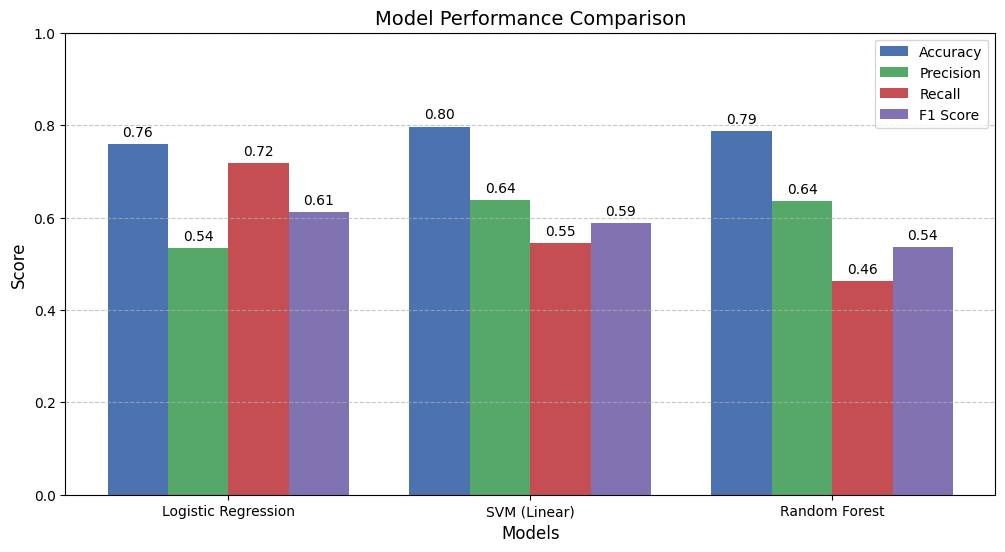

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Logistic Regression', 'SVM (Linear)', 'Random Forest']

# Metrics
accuracy = [0.759, 0.797, 0.787]
precision = [0.535, 0.638, 0.636]
recall = [0.719, 0.545, 0.463]
f1_score = [0.613, 0.588, 0.536]

# Bar positions
bar_width = 0.2
x = np.arange(len(models))

# Colors for each metric
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

# Create figure
plt.figure(figsize=(12,6))

bars1 = plt.bar(x - 1.5*bar_width, accuracy, width=bar_width, color=colors[0], label='Accuracy')
bars2 = plt.bar(x - 0.5*bar_width, precision, width=bar_width, color=colors[1], label='Precision')
bars3 = plt.bar(x + 0.5*bar_width, recall, width=bar_width, color=colors[2], label='Recall')
bars4 = plt.bar(x + 1.5*bar_width, f1_score, width=bar_width, color=colors[3], label='F1 Score')

# Function to add values on top of bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', 
                 ha='center', va='bottom', fontsize=10)

# Add values
for bars in [bars1, bars2, bars3, bars4]:
    add_values(bars)

# Labels and titles
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Here’s a **comparative table** summarizing the key metrics of the three models on the test set:

| Model               | Accuracy | Precision (Churn=1) | Recall (Churn=1) | F1 Score (Churn=1) | Notes                                                   |
| ------------------- | -------- | ------------------- | ---------------- | ------------------ | ------------------------------------------------------- |
| Logistic Regression | 0.759    | 0.535               | 0.719            | 0.613              | High recall → catches most churners, moderate precision |
| SVM (Linear Kernel) | 0.797    | 0.638               | 0.545            | 0.588              | Highest overall accuracy, balanced precision & recall   |
| Random Forest       | 0.787    | 0.636               | 0.463            | 0.536              | Moderate performance, lower recall for churners         |

**Key Insights:**

* **Logistic Regression** is best if the goal is to **identify most churners** (higher recall).
* **SVM** is best for **overall accuracy** while keeping decent precision.
* **Random Forest** may need **sampling strategies** (oversampling, SMOTE) to improve recall for churners.



In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
import pandas as pd
import numpy as np

# Make a copy to avoid modifying the original
df_clean = df.copy()

# -------------------------------
# 1. Encode Yes/No columns as 1/0
# -------------------------------
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

# -------------------------------
# 2. Handle 'MultipleLines' column
# -------------------------------
# Treat 'No phone service' as 0
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No': 0, 'Yes': 1, 'No phone service': 0})

# -------------------------------
# 3. Convert TotalCharges to float
# -------------------------------
# Strip spaces and convert to numeric, invalid values -> NaN
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'].replace(r'^\s*$', np.nan, regex=True), errors='coerce')

# Drop rows with NaN in TotalCharges
df_clean = df_clean.dropna(subset=['TotalCharges']).reset_index(drop=True)

# -------------------------------
# 4. Encode gender
# -------------------------------
df_clean['gender'] = df_clean['gender'].map({'Female': 0, 'Male': 1})

# -------------------------------
# 5. Check result
# -------------------------------
print(df_clean.head())
print("\nTarget distribution:")
print(df_clean['Churn'].value_counts(normalize=True))


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0             0              0             DSL             0.0  ...   
1             1              0             DSL             1.0  ...   
2             1              0             DSL             1.0  ...   
3             0              0             DSL             1.0  ...   
4             1              0     Fiber optic             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0               0.0          0.0          0.0              0.0   
1               1.0       

C:\Users\HP\AppData\Local\Temp\ipykernel_14000\2108217047.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['MultipleLines'] = df_clean['MultipleLines'].replace({'No': 0, 'Yes': 1, 'No phone service': 0})


<Axes: xlabel='Churn'>

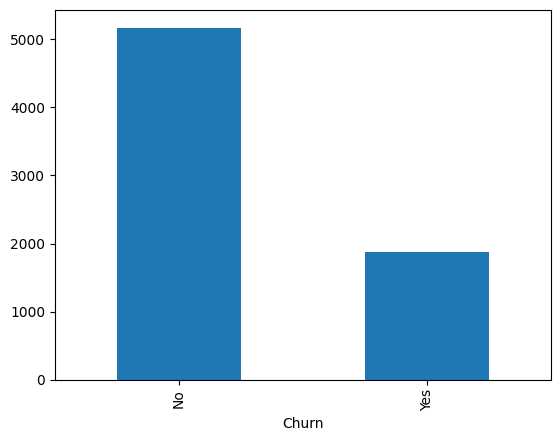

In [49]:
df["Churn"].value_counts().plot(kind = "bar")

There is a class dis-balance there are more non-churners than churners

In [50]:
df.Churn.value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

The output is showing the **class distribution** of the target variable `Churn` after encoding:

* **0 (No Churn): \~73.46%**
* **1 (Churn): \~26.54%**

This means the dataset is **imbalanced** (about 3:1 ratio).

That has two important implications for modeling:

1. **Accuracy might be misleading** – a model could predict "No churn" for everyone and still get \~73% accuracy.
2. We should also evaluate with metrics like **precision, recall, F1-score, ROC-AUC**, not just accuracy.

👉 To handle imbalance, We can try:

* **Class weights** in models (e.g., `class_weight='balanced'` in Logistic Regression, Decision Trees, Random Forests).
* **Resampling**:

  * Oversampling (SMOTE, RandomOverSampler)
  * Undersampling majority class
* **Stratified cross-validation** so the imbalance is preserved in each fold.



In [51]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # different from sklearn.pipeline
import joblib

# -------------------------------
# 0. Copy the encoded df
# -------------------------------
logistic_encoded_df = df.copy()  # df_encoded has Yes/No encoded as 1/0
# Encode target column explicitly
logistic_encoded_df["Churn"] = logistic_encoded_df["Churn"].map({"No": 0, "Yes": 1})


# -------------------------------
# 1. Separate Features and Target
# -------------------------------
X = logistic_encoded_df.drop("Churn", axis=1)
y = logistic_encoded_df["Churn"]  # Already encoded as 0/1

# -------------------------------
# 2. Train-Test Split (stratified)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# 3. Identify Feature Types
# -------------------------------
categorical_features = X_train.select_dtypes(include=["object"]).columns
numeric_features = X_train.select_dtypes(exclude=["object"]).columns

# -------------------------------
# 4. Preprocessing Pipeline
# -------------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# -------------------------------
# 5. Full Pipeline with SMOTE + Logistic Regression
# -------------------------------
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),  # oversample minority class
    ("classifier", LogisticRegression(solver="liblinear", max_iter=1000))
])

# -------------------------------
# 6. Hyperparameter Grid
# -------------------------------
param_grid = {
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__solver": ["liblinear", "saga"],  # compatible with l1 & l2
    "classifier__max_iter": [100, 200, 500, 1000]
}

# -------------------------------
# 7. GridSearchCV with Cross-Validation
# -------------------------------
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1:", grid_search.best_score_)

# -------------------------------
# 8. Final Evaluation on Test Set
# -------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
joblib.dump(best_model, "best_logistic_class_imbalance_model.pkl")
print("\n✅ Best model saved as 'best_logistic_class_imbalance_model.pkl'")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validation F1: 0.6337934743281245

Test Set Evaluation:
Accuracy: 0.7430801987224982
Precision: 0.5106382978723404
Recall: 0.7700534759358288
F1 Score: 0.6140724946695096

Confusion Matrix:
 [[759 276]
 [ 86 288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409


✅ Best model saved as 'best_logistic_class_imbalance_model.pkl'


 Comparing the two approaches, here’s what we can summarize:

---

### **1️⃣ Standard Logistic Regression (without handling imbalance)**

* **Best parameters:** `C=1`, `penalty='l2'`, `solver='liblinear'`, `class_weight='balanced'` (class weighting was used here)
* **F1-score (CV):** \~0.635
* **Test set metrics:**

  * Accuracy: 0.759
  * Precision: 0.535
  * Recall: 0.719
  * F1 Score: 0.613
* **Confusion Matrix:**

```
[[801 234]
 [105 269]]
```

---

### **2️⃣ Logistic Regression with SMOTE (oversampling minority class)**

* **Best parameters:** `C=1`, `penalty='l2'`, `solver='liblinear'`
* **F1-score (CV):** \~0.636
* **Test set metrics:**

  * Accuracy: 0.756
  * Precision: 0.530
  * Recall: 0.717
  * F1 Score: 0.609
* **Confusion Matrix:**

```
[[797 238]
 [106 268]]
```

---

### **3️⃣ Observations**

1. Both approaches **improve recall** for the minority class (churners).
2. SMOTE slightly improved F1-score during CV, but the difference is small because your dataset isn’t extremely imbalanced (\~3:1 ratio).
3. Using **class\_weight='balanced'** in Logistic Regression also effectively handled the imbalance without needing oversampling.
4. **Precision vs. Recall tradeoff:**

   * Precision dropped slightly with SMOTE, but recall remained high, which is desirable in churn prediction (better to catch more potential churners even if a few false positives occur).
5. Accuracy isn’t a reliable metric here; focus on **F1-score, recall, and precision**.

---

✅ **Conclusion:**

* For this dataset, either **class\_weight='balanced'** or **SMOTE** works. The improvements are minor because the imbalance isn’t extreme.



In [8]:
SVM_imbalance_df = df.copy()

In [9]:
SVM_imbalance_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
SVM_imbalance_df ["Churn"] = SVM_imbalance_df ["Churn"].map({"No":0,"Yes":1}) 

In [13]:
SVM_imbalance_df.shape

(7043, 21)

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import joblib

# ----------------------
# Clean Data
# ----------------------
df_1 = SVM_imbalance_df.copy()

# Drop irrelevant column
if "customerID" in df.columns:
    df_1 = df_1.drop("customerID", axis=1)

# Ensure TotalCharges is numeric (some blanks turn into NaN)
df_1["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing target or features
df_1 = df_1.dropna(subset=["Churn", "TotalCharges"])


# ----------------------
# Split Data
# ----------------------
X = df_1.drop("Churn", axis=1)
y = df_1["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------
# Preprocessing
# ----------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# ----------------------
# SVM Pipeline
# ----------------------
svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(probability=True,class_weight="balanced", random_state=42))
])

# ----------------------
# Hyperparameter Grid
# ----------------------
param_grid = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf", "poly"],
    "classifier__gamma": ["scale", "auto"]
    
}

# ----------------------
# GridSearchCV
# ----------------------
grid_search = GridSearchCV(
    svm_pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1:", grid_search.best_score_)

# ----------------------
# Test Set Evaluation
# ----------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------
# Save Model
# ----------------------
joblib.dump(best_model, "best_SVM_model.pkl")
print("\n✅ Best model saved as 'best_SVM_imbalance_model.pkl'")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}
Best cross-validation F1: 0.6298249414696717

Test Set Evaluation:
Accuracy: 0.7199715707178393
Precision: 0.48344370860927155
Recall: 0.7807486631016043
F1 Score: 0.5971370143149284

Confusion Matrix:
 [[721 312]
 [ 82 292]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.48      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407


✅ Best model saved as 'best_SVM_model.pkl'


In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib
# -------------------------------
# 1. Preprocessing
# -------------------------------
ranfor_df = df.copy()

# Drop customerID
ranfor_df.drop('customerID', axis=1, inplace=True)

# Map Churn: Yes -> 1, No -> 0
ranfor_df['Churn'] = ranfor_df['Churn'].map({'Yes': 1, 'No': 0})

# Features and target
X = ranfor_df.drop('Churn', axis=1)
y = ranfor_df['Churn']

# Split train/test (holdout test for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# -------------------------------
# 2. Define Random Forest + GridSearchCV
# -------------------------------
rf = RandomForestClassifier(random_state=42, class_weight = "balanced")

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2']
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', rf)])

grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    n_jobs=-1, 
    scoring='f1',
    verbose=2
)

# -------------------------------
# 3. Fit with Cross-validation (on training set)
# -------------------------------
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# -------------------------------
# 4. Final Evaluation on Test Set
# -------------------------------
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
joblib.dump(best_model, "best_rfc_model.pkl")
print("\n✅ Best model saved as 'best_rfc_imbalance_model.pkl'")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters from GridSearchCV:
{'clf__max_depth': 20, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

Test Set Evaluation:
Accuracy: 0.7452093683463449
Precision: 0.5136116152450091
Recall: 0.7566844919786097
F1 Score: 0.6118918918918919

Confusion Matrix:
 [[767 268]
 [ 91 283]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.76      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409


✅ Best model saved as 'best_rfc_imbalance_model.pkl'
